In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('diabetes_pIC50_pubchem_fp.csv')

In [3]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1612,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1613,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1614,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = df.pIC50
Y

,pIC50
0,6.536107
1,6.769551
2,7.136677
3,6.602060
4,6.709965
...,...
1611,4.585027
1612,4.636388
1613,6.247184
1614,7.744727


In [5]:
X.shape

(1616, 881)

In [6]:
Y.shape

(1616,)

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [8]:
X.shape

(1616, 165)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
X_train.shape, Y_train.shape

((1292, 165), (1292,))

In [11]:
X_test.shape, Y_test.shape

((324, 165), (324,))

In [21]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.6234019803181649

In [22]:
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

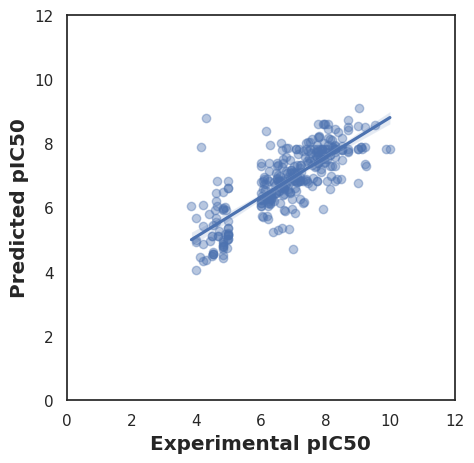

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Importing pandas to create a DataFrame

sns.set(color_codes=True)
sns.set_style("white")

# Create a DataFrame with Y_test and Y_pred
df = pd.DataFrame({'Experimental pIC50': Y_test, 'Predicted pIC50': Y_pred})

# Use the DataFrame and column names in regplot
ax = sns.regplot(x='Experimental pIC50', y='Predicted pIC50', data=df, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show